<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Ciencia de Datos</center></span>

# <span style="color:green"><center>Regresión lineal múltiple</center></span>

<figure>
<center>
<img src="../Imagenes/GraficoRegresionLinealMultiplePlotly.png" width="600" height="600" align="center" /> 
</center>   
</figure>

## <span style="color:#4361EE">Profesores</span>

* Alvaro  Montenegro, PhD, <ammontenegrod@unal.edu.co>
* Campo Elías Pardo, PhD, <cepardot@unal.edu.co>
* Daniel  Montenegro, Msc, <dextronomo@gmail.com>
* Camilo José Torres Jiménez, Msc, <cjtorresj@unal.edu.co>

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

* Maria del Pilar Montenegro, pmontenegro88@gmail.com
* Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

* Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

* David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

* Dairo Moreno, damoralesj@unal.edu.co
* Joan Castro, jocastroc@unal.edu.co
* Bryan Riveros, briveros@unal.edu.co
* Rosmer Vargas, rovargasc@unal.edu.co
* Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

* Giovvani Barrera, udgiovanni@gmail.com
* Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:#4361EE">Regresión lineal múltiple</span>

Vamos a trabajar un dataset desde su inicio con la intención de generar un modelo de regresión lineal múltiple.

en este caso trataremos de predecir el precio de una casa en california con base en sus distintas características.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Revisamos el tipo de los datos y si tenemos casos nulos

In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


No hay datos nulos, así que podemos trabajar con tranquilidad. Al menos en ese caso.


Podemos continuar obteniendo las estadísticas descriptivas básicas

In [4]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Notamos que las variables tienen rangos muy distintos. Vamos guardar esta información para más adelante.

Por ahora Necesitamos revisar si las variables explicativas/independientes son, en efecto, independientes entre sí.

La forma más rápida de hacer esto es haciendo la matríz de correlación

<AxesSubplot:>

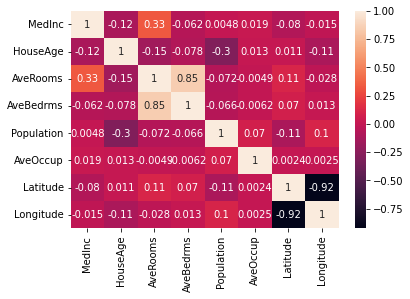

In [5]:
import seaborn as sns

corr_matrix  = housing_df.corr()

sns.heatmap(corr_matrix, annot=True)

Vemos que las variables "AveRooms" y "AveBedrms" tienen una alta correlación, así que podemos considerar eliminar una de estas dos (¿Cuál sería la mejor?)

También "Latitude" y "Longitude" tienen alta correlación, pero en este caso no es posible separarlas ya que no tienen sentido de manera separada. En este caso es mejor o quitarlas las dos o dejarlas. Vamos a quitarlas en este caso

<AxesSubplot:>

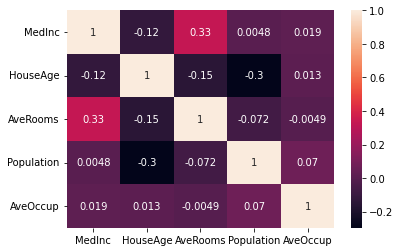

In [6]:
housing_df_drop = housing_df.drop(["AveBedrms", "Latitude", "Longitude"], axis=1)

corr_matrix_drop  = housing_df_drop.corr()

sns.heatmap(corr_matrix_drop, annot=True)

Hay una segunda manera de arreglar multicolinealidad, podemos hacer un análisis de componentes principales. Los componentes resultantes van a tener 0 correlación entre si, y a la vez mantendremos la información de los datos originales

<AxesSubplot:>

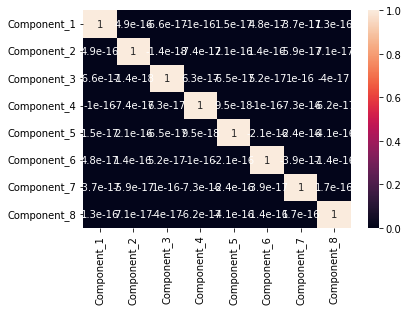

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)

components=pca.fit_transform(housing_df)

components_df=pd.DataFrame(data=components,columns=['Component_1','Component_2','Component_3',
                                                    'Component_4','Component_5', 'Component_6',
                                                    'Component_7', 'Component_8'])

corr_matrix_pca = components_df.corr()

sns.heatmap(corr_matrix_pca, annot=True)

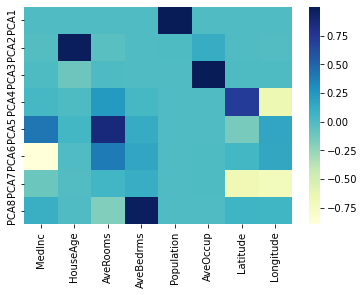

In [8]:
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(housing_df.columns))

Podemos oficialmente definir nuestro modelo, pero antes, vamos a hacer dos cosas importantes.

- Separar la base de datos en un grupo de entrenamiento y prueba, para verdaderamente tener una perspectiva sobre la capacidad del modelo
- Escalar las variables, para evitar sesgos debido a las diferencias de rango

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_train, X_test, y_train, y_test = train_test_split(housing_df_drop, housing.target, test_size=0.3, random_state=13)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.231990,0.542569,0.030525,0.040054,0.001952
std,0.131238,0.246838,0.018698,0.032364,0.009963
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.141812,0.333333,0.023517,0.022087,0.001399
50%,0.208625,0.549020,0.029085,0.032766,0.001712
75%,0.292605,0.705882,0.034893,0.048659,0.002082
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_scaled, y_train)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_train = reg.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print(mse_train)
print(mae_train)

0.646166916733548
0.5979131971083576


In [12]:
y_pred = reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(mse)
print(mae)

0.6481302283555613
0.6015497091820178


Lo anterior es desde el enfoque general del aprendizaje de máquinas. El enfoque estadístico podría estar interesado en algo como lo siguiente:

In [13]:
import statsmodels.api as sm
X = X_train_scaled
y = y_train
# Agregar una columna de unos para el intercepto
X = sm.add_constant(X)
# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()
# Obtener los resultados de la regresión
results = model.summary()
# Imprimir los resultados
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     3049.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:59:16   Log-Likelihood:                -17346.
No. Observations:               14448   AIC:                         3.470e+04
Df Residuals:                   14442   BIC:                         3.475e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1663      0.028      6.020      0.0

In [14]:
print(housing_df_drop.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup'], dtype='object')


In [33]:
import plotly.graph_objs as go
import numpy as np
# Crear una malla de valores para el plano de regresión
x_values = np.linspace(X_train_scaled[:,0].min(), X_train_scaled[:,0].max(), 20)
y_values = np.linspace(X_train_scaled[:,1].min(), X_train_scaled[:,1].max(), 20)
xx, yy = np.meshgrid(x_values, y_values)
zz = reg.intercept_ + reg.coef_[0] * xx + reg.coef_[1] * yy
# Crear un gráfico 3D con el plano de regresión
fig = go.Figure()
# Agregar el plano de regresión
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, opacity=0.8, showscale=False, colorscale='YlOrRd'))
# Agregar los puntos de prueba
fig.add_trace(go.Scatter3d(x=X_test_scaled[:,0], y=X_test_scaled[:,1], z=y_test, mode='markers', 
                           marker=dict(size=1.5, color='blue', opacity=0.5)))
# Personalizar el diseño del gráfico
fig.update_layout(
    scene=dict(
        xaxis_title='MedInc',
        yaxis_title='HouseAge',
        zaxis_title='target',
    ),
    showlegend=False,
    title='Plano de Regresión Lineal Múltiple en 3D',
    width=600,  # Ancho en píxeles
    height=600  # Alto en píxeles
)
# Mostrar el gráfico
fig.show()